In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
# load data
data = pd.read_csv("weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
# checking that is there cleaning required

In [6]:
data.shape

(10000, 3)

In [7]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


In [8]:
data.Gender.value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

In [9]:
data.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [10]:
data.duplicated().sum()

0

<Axes: ylabel='Height'>

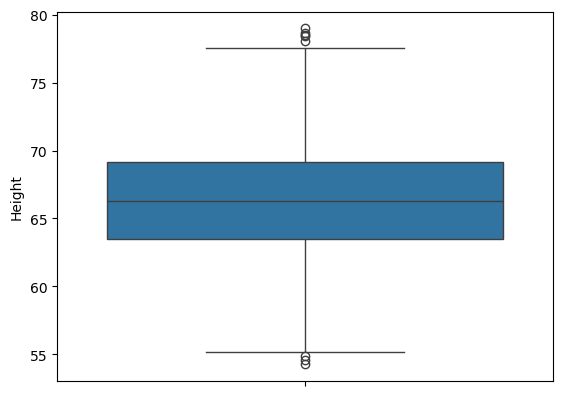

In [11]:
sns.boxplot(data.Height)

<Axes: ylabel='Weight'>

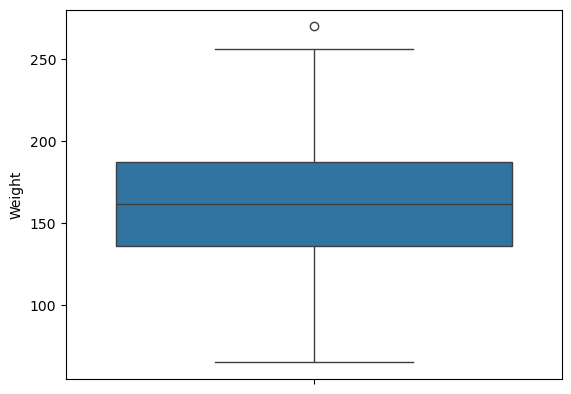

In [13]:
sns.boxplot(data.Weight)

In [21]:
data.corr()

ValueError: could not convert string to float: 'Male'

# Checking Conditions for Linear Regression
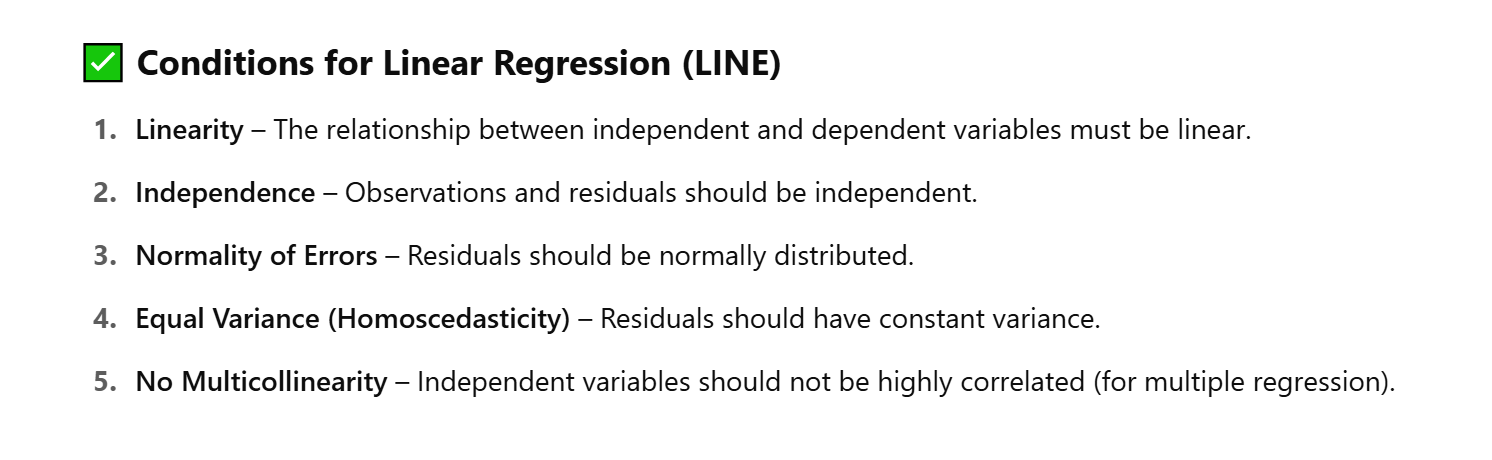

In [27]:
# correlation for regression necessary

data.Height.corr(data.Weight)
# highly correlated (showing linear regression can be applied)

0.9247562987378065

<Axes: xlabel='Height', ylabel='Weight'>

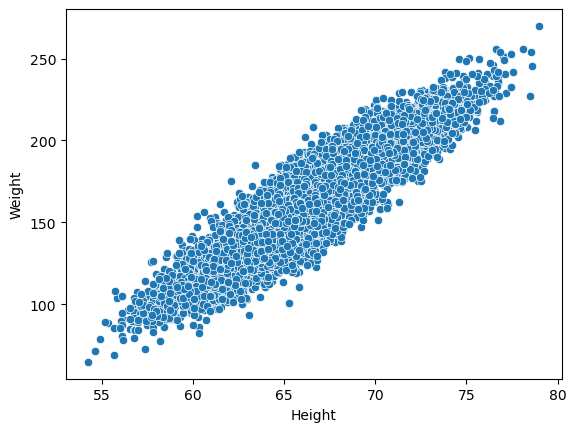

In [29]:
sns.scatterplot(x = data.Height, y = data.Weight)

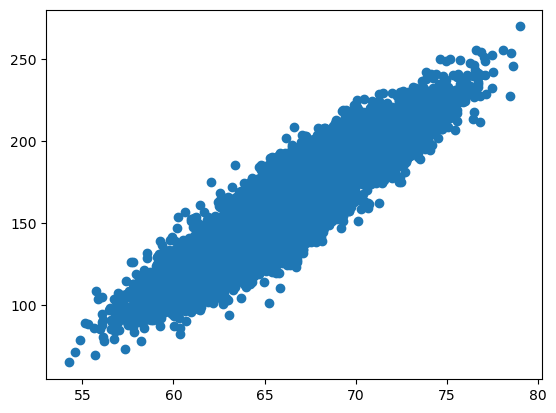

In [31]:
plt.scatter(x = data.Height, y = data.Weight)

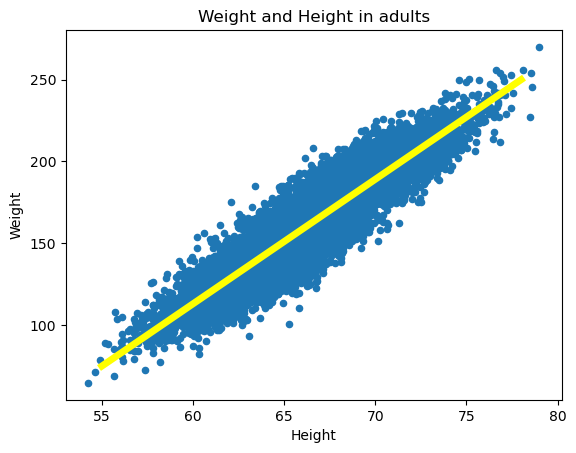

In [35]:
data.plot(kind='scatter', x='Height', y='Weight',
        title='Weight and Height in adults')
plt.plot([55, 78], [75, 250], color='yellow', linewidth=5)

# just eg of line

In [44]:
# Shows linear relation

# Simple Regression Model

In [47]:
def line(x, w=0, b=0):
    y = w*x + b
    return y


In [49]:
X = data[["Height"]].values
y_true = data[["Weight"]].values

In [51]:
X.shape

(10000, 1)

In [53]:
y_true.shape

(10000, 1)

In [59]:
y_pred = line(X)   # all X are passed to line function one by one

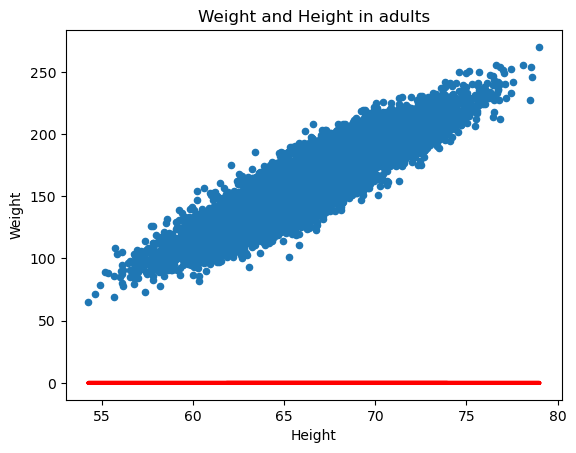

In [61]:
data.plot(kind='scatter', x='Height', y='Weight',
        title='Weight and Height in adults')

plt.plot(X, y_pred, color = "red", linewidth = 3)

Absolutely! Here's a **simple example** using a sample DataFrame to clearly show the **difference between single and double brackets**, and what `.values` returns in each case:

---

### 🧪 Example DataFrame

```python
import pandas as pd

# Create a sample DataFrame
df = pd.DataFrame({
    "Height": [150, 160, 170],
    "Weight": [50, 60, 70]
})
```

---

### 📌 Case 1: Single Bracket (`df["Height"]`)

```python
X1 = df["Height"].values
print(X1)
print(X1.shape)
```

#### ✅ Output:

```python
[150 160 170]
(3,)   # 1D array with 3 elements
```

---

### 📌 Case 2: Double Bracket (`df[["Weight"]]`)

```python
y1 = df[["Weight"]].values
print(y1)
print(y1.shape)
```

#### ✅ Output:

```python
[[50]
 [60]
 [70]]
(3, 1)   # 2D array with 3 rows and 1 column
```

---

### ⚠️ Why It Matters:

If you’re doing machine learning, most models (like scikit-learn’s `LinearRegression`) expect input like this:

```python
model.fit(X, y)  # X should be 2D, y should be 1D or 2D
```

So:

* ✅ `df[["Height"]].values` → shape `(n, 1)` — correct for X
* ✅ `df[["Weight"]].values` → shape `(n, 1)` — also correct for y

But:

* ❌ `df["Height"].values` → shape `(n,)` — might cause shape mismatch error

---

Would you like to see how to reshape a 1D array into 2D using `.reshape(-1, 1)` if needed?


In [70]:
X = data["Height"].values
y_true = data["Weight"].values

In [72]:
y_pred = line(X)  

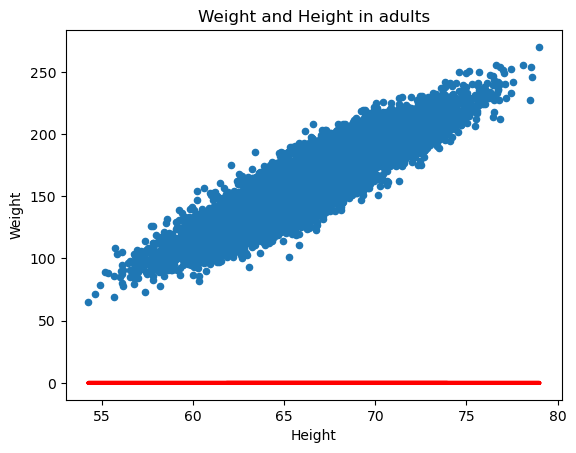

In [74]:
data.plot(kind='scatter', x='Height', y='Weight',
        title='Weight and Height in adults')

plt.plot(X, y_pred, color = "red", linewidth = 3)

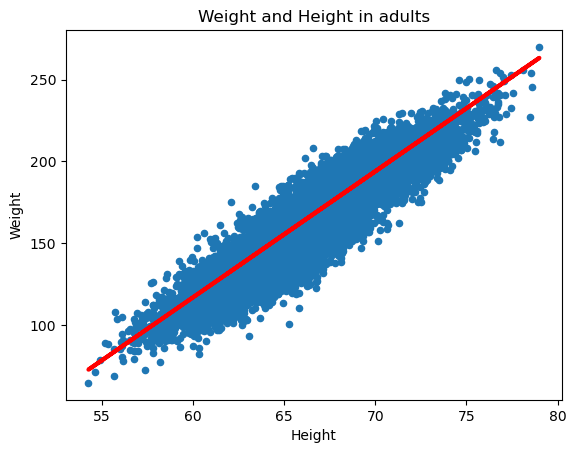

In [88]:
y_pred = line(X,7.7,-345)
data.plot(kind='scatter', x='Height', y='Weight',
        title='Weight and Height in adults')

plt.plot(X, y_pred, color = "red", linewidth = 3)

In [90]:
# Best Approximate to yellow line and eqn we have y = 7.7x - 345

## This line looks best fit but how does our model model know it?


# Cost Function

In [94]:
def mean_squared_error(y_true,y_pred):
    s = (y_true - y_pred) ** 2
    return s.mean()

In [96]:
mean_squared_error(y_true,y_pred)

170.36466084375394

# Now Moving on to ML models

## Simple Linear Regression
    - 1 input >>> Height
    - Target  >>> Weight

In [103]:
data.Gender

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
9995    Female
9996    Female
9997    Female
9998    Female
9999    Female
Name: Gender, Length: 10000, dtype: object

In [105]:
X = data.Height
y = data.Weight

In [107]:
X.ndim  # form of array

1

### Scikit Learn 

In [110]:
import sklearn

In [112]:
# for linear regression

In [114]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [116]:
# Train model

In [118]:
lr.fit(X,y) # trains model  finds best slope and intercept

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

# the error in the last part is basically due to the data input
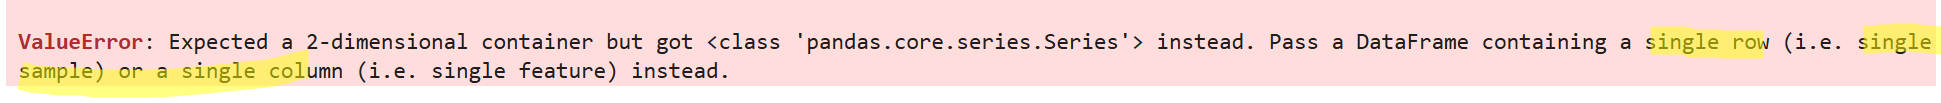

### the data must be fed as a column (2d array), not 1d array. every record from 2d array is fed in model one by one. if we havae array then all 1d array would be fed as it is leading to error. 

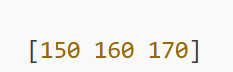  Not This
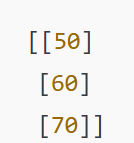  This

### resolving error

In [131]:
X = data[['Height']]   ## input needs to be 2D not necessraly output (if there are 2 cols then no need to think of it)
y = data[['Weight']]

In [135]:
X.ndim

2

In [137]:
y.ndim

2

In [139]:
lr.fit(X,y)

LinearRegression()

In [141]:
lr.coef_       # gradient

array([[7.71728764]])

In [143]:
lr.intercept_  # intercept

array([-350.73719182])

In [145]:
height = input("Enter height for weight: ")
lr.predict(height)

Enter height for weight:  34


C:\Users\Tesla Laptops\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=34.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [147]:
height = input("Enter height for weight: ")
lr.predict(np.array([[height]]))

Enter height for weight:  34


C:\Users\Tesla Laptops\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [149]:
height = float(input("Enter height for weight: "))
lr.predict(np.array([[height]]))

Enter height for weight:  70


C:\Users\Tesla Laptops\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[189.47294304]])

# 6 May Class

Sure! Let's break down **MSE — Mean Squared Error** — one of the most common metrics used to evaluate regression models.

---

## 💡 What is MSE?

**Mean Squared Error (MSE)** is a way to measure how far off your model’s predictions are from the actual values.

### 🧮 Formula:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}_i} - y_{\text{pred}_i})^2
$$

Where:

* $y_{\text{true}_i}$: actual value of data point $i$
* $y_{\text{pred}_i}$: predicted value of data point $i$
* $n$: total number of data points

---

## 🔍 Step-by-Step Example:

Let's say you have:

* Actual (true) values: `y_true = [3, 5, 7]`
* Predicted values: `y_pred = [2, 5, 10]`

### Step 1: Subtract true and predicted values

```
Errors = [3−2, 5−5, 7−10] = [1, 0, -3]
```

### Step 2: Square the errors

```
Squared Errors = [1², 0², (-3)²] = [1, 0, 9]
```

### Step 3: Average the squared errors

```
MSE = (1 + 0 + 9) / 3 = 10 / 3 ≈ 3.33
```

So, your model’s **Mean Squared Error is 3.33**, meaning that **on average**, the squared difference between predictions and actual values is 3.33.

---

## ✅ Why Use MSE?

* **Always non-negative** (squaring removes negatives).
* **Penalizes large errors more** than smaller ones.
* Widely used in optimization (like in training regression models with gradient descent).

---

## 🔁 Tip:

To compute it in Python:

```python
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, y_pred)
```

Would you like a quick visualization of MSE on a scatterplot to show the errors?


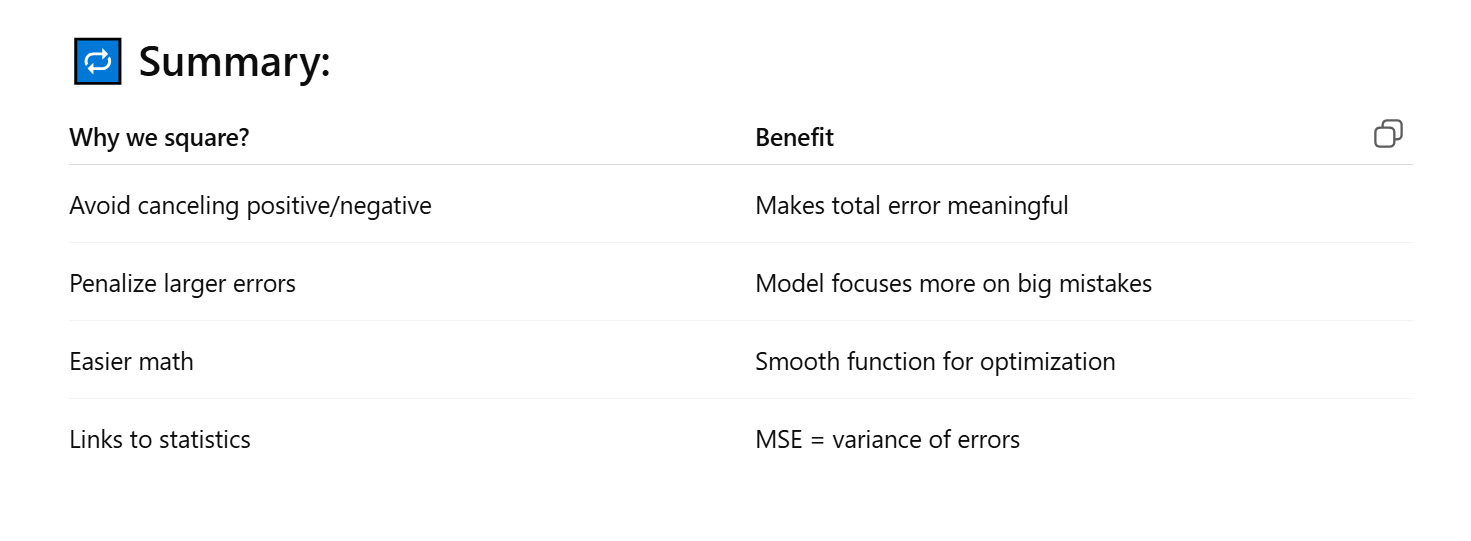

In [158]:
mean_squared_error(y_true,y_pred)  
# So, your model’s Mean Squared Error is 170.37, meaning that on average, the squared difference between predictions and actual values is 170.37.

170.36466084375394

In [160]:
# absolute error
mean_squared_error(y_true,y_pred) ** 0.5  

## error is getting checked while our model is run by different paramters and alignment of line

13.052381424236495